In [14]:
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [2]:
data_txt = pd.read_csv("datos/data_txt_clean.txt",sep=';')
data_txt.head(2)

,index,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34
0,0,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None
1,1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,NaN


(array([3099., 1860.,    0., 7874.,    0., 5881., 4061.,    0., 2166.,
        1032.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

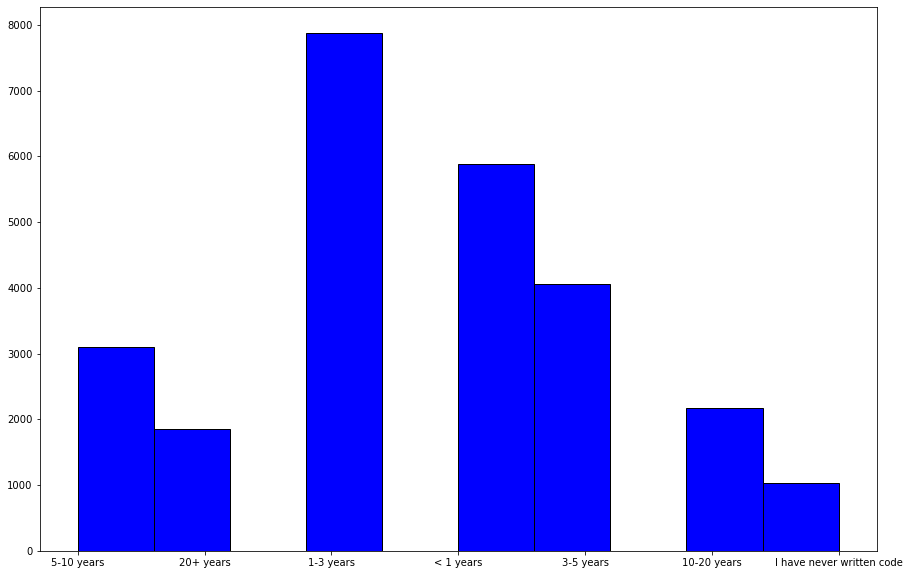

In [19]:
plt.figure(figsize = (15, 10))

plt.hist(data_txt["Q6"], facecolor = "b", edgecolor = "black", bins = 10)

In [3]:
paises = pd.DataFrame(data_txt.Q3.value_counts())
paises.head(2) # Para ver los países de los que vienen los datos

,count
Q3,
India,7434
United States of America,2650


In [4]:
años_experiencia = pd.DataFrame(data_txt.Q6.value_counts())
años_experiencia

,count
Q6,
1-3 years,7874
< 1 years,5881
3-5 years,4061
5-10 years,3099
10-20 years,2166
20+ years,1860
I have never written code,1032


In [5]:
salario = pd.DataFrame(data_txt.Q25.value_counts())
salario.sample(2)

# Para ver qué cobra generalmente para este campo. Buscar para analistas y business intelligence en Europa. 

,count
Q25,
"5,000-7,499",699
"10,000-14,999",950


Ve qués se cobra generalmente para este campo. Buscar para analistas y business intelligence en Europa. Ver también diferencias entre géneros. Mujeres y hombres trabajando en el sector (con un quesito). Años de experiencia por géneros, ver si las mujeres se han ido incorporando más a este mercado o no. Ver nivel de estudios en relación con el puesto que ocupa Y los años experiencia.

Estudio de mercado: Las personas que trabajan de estos puestos: tamaño empresa, industria... 
Machine learning: Cuánto invierten realmente en *Machine Learning*.

Qué herramientas utilizan (realizar para todas las columnas).

Hacer un filtro:

.isin(): puestos - data analyst y business intelligence. Ver todas las herramientas de manera general. Hacerlo con **todas**. 
Filtro por género para buscar por mujeres. 
- Un dataframe para ver las herramientas: 
    - cómo varían las herramientas según los años de experiencia.


Brecha salarial para mujeres y hombres en el mismo puesto. A tener en cuenta: mismos años, mismo puesto... ver si hay diferencia de salario real.

Años de las mujeres que estén trabajando en el sector, para ver si hay edades que trabajen menos por cuestiones de maternidad, etc. 


¿Qué tipo de gráficas vamos a querer?

- Graficas que hay:
    - Barras. Las barras apiladas para poder los años de experiencia que tienen los hombres vs. mujeres, para comprobar si los hombres se mantienen en el sector más o menos que las mujeres.
    - Dispersión. Quizá para ver la brecha salarial entre géneros, u otras cosas. 
    - Histogramas. Por ejemplo, para ver las edades, para las herramientas...
    - Sectores(quesitos): Géneros en el sector. 
    - Violín. No vemos utilidad.
    - De caja. No vemos utilidad. 

In [6]:
data_xml = pd.read_xml("datos/data_xml_clean.xml")


In [7]:
data_xml["gender"].value_counts()
#Esto lo vamos a poner tal cual. La diferencia entre hombres y mujeres es abismal. 

gender
Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: count, dtype: int64

In [8]:
data_csv1 = pd.read_csv("datos/exported_db_data.csv")
data_csv1.set_index(["index"], inplace= True)
data_csv1.head(1)


,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
index,,,,,,,,,,,,,,,,,
0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_csv1.columns

Index(['Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4', 'Q10_Part_5',
       'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_10',
       'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_13', 'Q10_Part_14',
       'Q10_Part_15', 'Q10_Part_16', 'Q10_OTHER'],
      dtype='object')

In [10]:
data_csv1['unidas'] = ''
data_csv1.head(1)

,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,unidas
index,,,,,,,,,,,,,,,,,,
0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [11]:
for columna in data_csv1.columns:

    data_csv1[columna]= data_csv1[columna].astype(str)

In [12]:
for fila in range(data_csv1.shape[0]):
    lista= []
    texto = ''
    for columna in range(data_csv1.shape[1]):
        if data_csv1.iloc[fila,columna].lower() not in ['nan']:
            if columna == 0:
                texto = data_csv1.iloc[fila,columna].lower()
            else:
                texto = texto + ',' + data_csv1.iloc[fila,columna]
        if columna == (data_csv1.shape[1])-1:
            data_csv1['unidas'][fila] = texto



KeyboardInterrupt: 

In [ ]:
data_csv1.head()

,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,unidas
index,,,,,,,,,,,,,,,,,,
0,nan,Colab Notebooks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,",Colab Notebooks,"
1,Kaggle Notebooks,Colab Notebooks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"kaggle notebooks,Colab Notebooks,"
2,Kaggle Notebooks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"kaggle notebooks,"
3,nan,Colab Notebooks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,",Colab Notebooks,"
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Google Cloud Datalab,nan,nan,nan,nan,nan,nan,",Google Cloud Datalab,"


- Crear el Dataframe sólo con los países de Europa.
- Quedarnos únicamente con Data Analyst y con Business Intelligence 
